Poisson Process

## 從 Binomial 到 Poisson

X ~ 一小時經過的汽車數量。

如果讓 X 的平均期望值 EX = &lambda;, 則可以知道:

$
E(X) = \lambda \frac{\text{cars}}{\text{per hour}} = n \times p = 
60 \times \frac{\lambda}{60}
$

上面將 &lambda; [一小時] 經過的車數，分成了 [每分鐘] 經過的車數；  
如果每小時經過車數是3輛車，於是每分鐘預期經過車數就應該是 $ \frac{3}{60} = \frac{\lambda}{60} = p $  

從 binomial 我們知道，分成 n=60 個一分鐘的區段，每一分鐘可能有車子經過的機率是 $ p = \frac{\lambda}{60} $  
那麼 binomial 的期望值是 $ n \times p $

但是這裏有個問題，如果某一小時經過的車數是 &gt; 1,   
比方說某一分鐘經過了 9 輛車，那麼就無法簡單使用 Binomial 成功/失敗 的二元分類。  
不過如果我們再細分到秒，就更難出現某一秒鐘經過了超過一台車子 的狀況。

$
E(X) = \lambda \frac{\text{cars}}{\text{per second}} = n \times p = 
3600 \times \frac{\lambda}{3600}
$


這樣子去計算 binomial，一小時經過了 k 台車的機率是:

$$
P \Big( X = k \Big) = \binom{60}{k} \big( \frac{\lambda}{60} \big)^k \times \big( 1 - \frac{\lambda}{60} \big)^{60-k}
$$

利用 Poisson Approximation

$$
P \Big( X = k \Big) = \binom{60}{k} \big( \frac{\lambda}{60} \big)^k \times \big( 1 - \frac{\lambda}{60} \big)^{60-k}
= \frac{\lambda^k}{k!} e^{-\lambda}
$$

如果 &lambda; = 9, 每小時經過9輛車。想問接下來一個小時只會經過 2輛車 的機率，利用上述公式:

$$
P \big( X = 2 \big) = \frac{9^2}{2!} e^{-9} = 0.4998 \%
$$

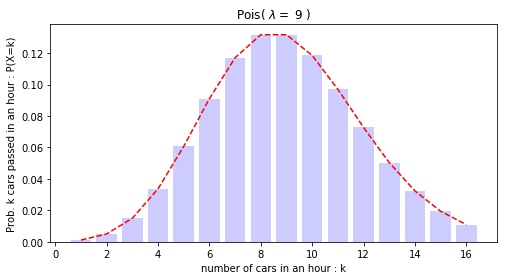

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab

p_lambda = 9
x = range(1,17)
y = []
for ix in x:
    iy = np.power(p_lambda, ix) / np.math.factorial(ix) * np.exp(-p_lambda)
    y.append(iy)

fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(x, y, color="blue", alpha=.2)
ax.plot(x, y, 'k--', linewidth=1.5, color='r')
ax.set_title(r'Pois( $\lambda = $ %d )' % (p_lambda))
ax.set_xlabel('number of cars in an hour : k')
ax.set_ylabel('Prob. k cars passed in an hour : P(X=k)')

plt.show();

### Random Process / Stochastic Process

[隨機過程] 的定義:  

給定任意一個時間 t, $ X(t) $ 是在時間 t 時候的一個 r.v., 則稱 : $ \big\{ X(t), \ 0 \le t \lt \infty \ \big\} $
為一個隨機過程。

[Poisson Process] 的定義:

當一個隨機過程滿足下列四個條件，稱為 Poisson Process.

#### 1 : $ \ \ X(0) = 0 $


#### 2 : 對於任何一串的時間序列 $ 0 \le s_1 \le t_1 \le s_2 \le t_2 \le \cdots \le s_n \le t_n $, n 為任意的整數。 

則 : 
$ X(t_1) - X(s_1), \\ X(t_2) - X(s_2), \\ \vdots \  , \\ X(t_n) - X(s_n) $  
are n independent r.v.s

#### 3 : 對任何 $ t \ge 0, \ s \ge 0 $

$ X(t) - X(0) $ 與 $ X(t+s) - X(s) $ 有相同機率分佈。

#### 4 : 對任何 t 和 k = 0,1,2,3,...

$ P \Big( X(t) = k \Big) = \frac{(\lambda \ t)^k}{k!} e^{-\lambda t} $